In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data=nc.Dataset('/scratch/user/xiliangdiao/firstpaper/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.AICE.002101-050112.nc')
#plotvar3 = data.variables['aice'][8:5760:12,224:343,600:1400]
plotvar3 = data.variables['aice'][8:5760:12,247:365,700:1300]

In [3]:
aveplot = np.nanmean(plotvar3,axis=1)

In [4]:
ave = np.nanmean(aveplot,axis=1)

In [5]:
ave.shape

(480,)

In [6]:
ww = np.convolve(ave, np.ones((5,))/5, mode='valid')

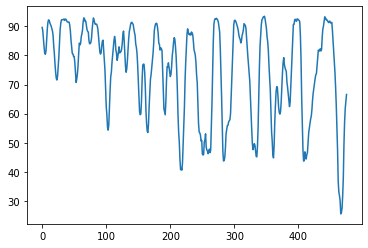

In [7]:
plt.plot(ww)

In [8]:
wspxx = np.loadtxt("wspxx.out")
mrpxx = np.loadtxt("mrpxx.out")
noxx = np.loadtxt("noxx.out")

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


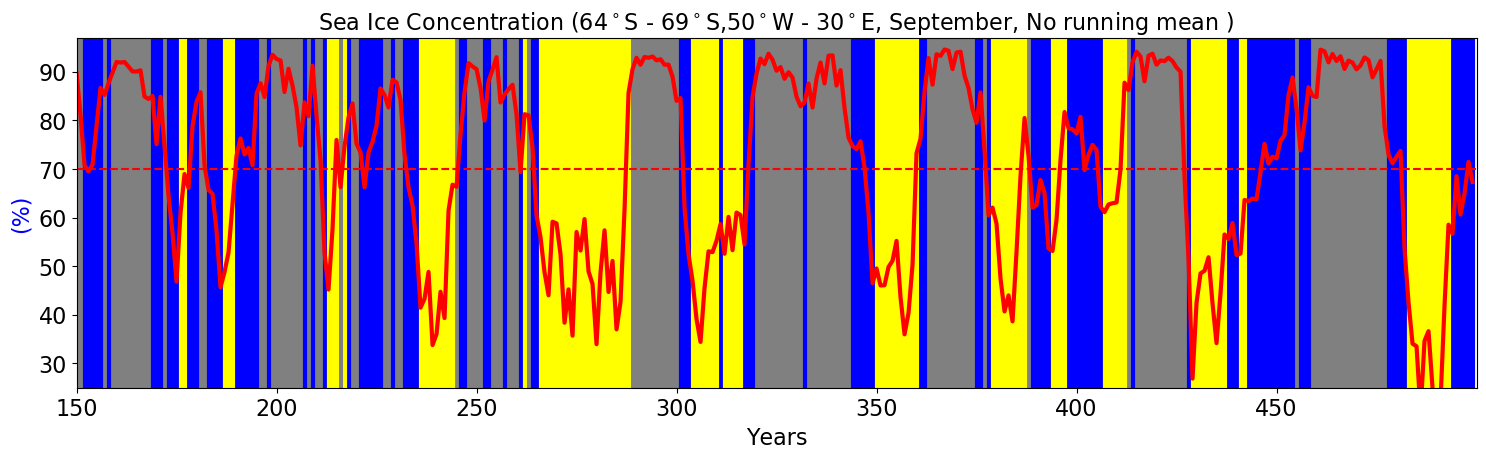

In [9]:
#t = np.arange(0,4176,12)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(ave[130:],'red',linewidth=3)
#plt.hlines(nn, 0, 4150, colors = "b",linestyles = "dashed")
#ax0.plot(tem,'red',linewidth=3)
#########################################
plt.vlines(noxx, 25, 97, colors = "grey",linewidth=3)
plt.vlines(mrpxx, 25, 97, colors = "blue",linewidth=3)
plt.vlines(wspxx, 25, 97, colors = "yellow",linewidth=3)
plt.hlines(70, 0, 350, colors = "r",linestyles = "dashed")
plt.xticks(range(0,350,50), ['150','200','250','300', '350', '400','450','500'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('(%)',color= 'b',**my_font)
plt.axis("tight")
ax0.set(ylim=(25, 97),xlim=(0, 350))
ax0.set_title('Sea Ice Concentration (64$^\circ$S - 69$^\circ$S,50$^\circ$W - 30$^\circ$E, September, No running mean )',**my_font)
plt.savefig("seaice.png",bbox_inches='tight',dpi=fig.dpi)

In [10]:
ave[129:479].shape

(350,)

In [11]:
np.savetxt('iceareayear1new.out', ave[129:479])